# Performances: Generalization, Regularization

In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

1) Try to fit the following data with a straight line(y=mx+c). Plot data points along with actual function and your line.

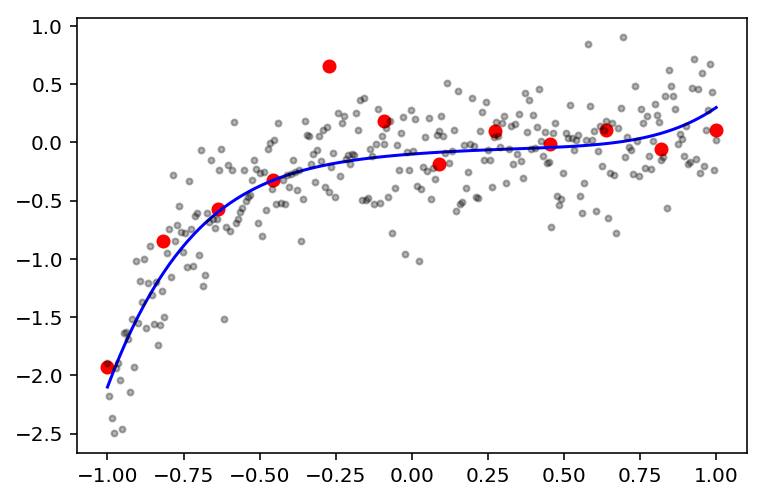

In [2]:
np.random.seed(7777)
ndata = 12
z = [0.6, -0.5, 0.4, -0.3, 0.2, -0.1]
a,b,c,d,e,f = z
noise = 0.3
xs = np.linspace(-1, 1, ndata)
tx = xs
ys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ndata)*noise
actualxs = np.linspace(-1,1,100)
tx = actualxs
actualys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f)

ntest = 300
testxs = np.linspace(-1,1,ntest)
tx = testxs
testys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ntest)*noise

plt.plot(xs, ys,'or')
plt.plot(actualxs, actualys,'b')
plt.plot(testxs, testys, '.k', alpha=0.3)

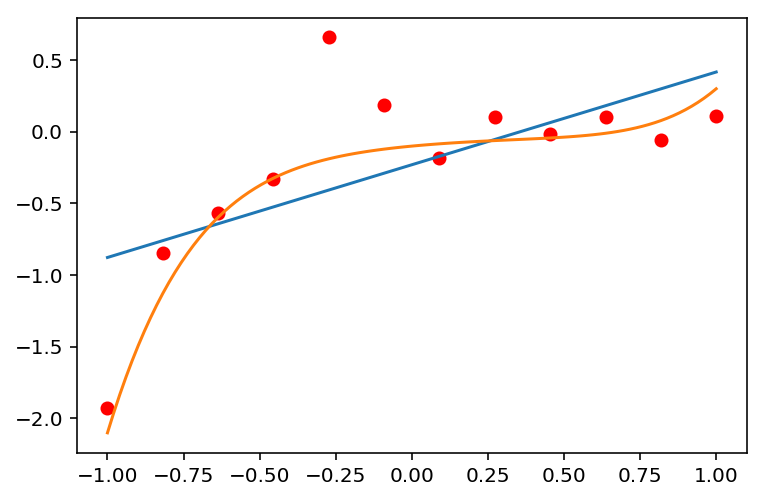

In [3]:
#put your code here

def guess(w, x):
    m, c = w
    return m*x + c

def cost(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    
w = minimize(cost, [0,0]).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
plt.plot(actualxs, actualys)

2) What is your in-sample error? $E_{in}$

3) What is your out-sample error? $E_{out}$

4) Between $E_{in}$ and $E_{out}$
- Which one do we really want to optimize? 
- Which one do we actually optimize when we train our model?

5) Now Try fit it with polynomial degree 2 ($ax^2 + bx + c)$. Same deal, plot, find $E_{in}$ and $E_{out}$. (Think about a generic function that does this for any number of degree)

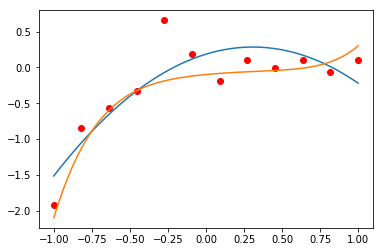

In [6]:
#put your code here

def guess(w, x):
    a, b, c = w
    return a*x**2 + b*x + c

def cost(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    
w = minimize(cost, [0]*3).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
plt.plot(actualxs, actualys)

6) Try it with degree 3, 4, 5 ... 11. Can you explain what happen at degree 11?

<span style="color:red;"> DO NOT COPY PASTE codes. Write a function and use for loop </span>

7) Now plot polynomial degree vs $E_{in}$ and degree vs $E_{out}$



8) Explain why you see the graph you see in above.

- What's wrong with model that is too simple
- What's wrong with model that is too complex

# Regularization.

1) Print $w$ from those degree 11 polynomial model. What went wrong with overly complex model?

2) How should we penalize the model to prevent overly complex model?

In particular, what is does the penalized cost function looks like?

3) What happen if our penalty is too small? What happend if our penalty is too big?

4) If $\lambda$ is small do we expect to get complex or simple model? Why?

5)Try Regularize with $\lambda=1\times10^{-8}$, $\lambda=0.01$ and $\lambda=100$

6) Sketch by hand E_in and Eout vs $\lambda$. Then, Try plotting log(1/lambda) vs Ein and Eout.

# Model Selection

1) Why don't  we just use every single data to train?

2) What is validation data set for?

3) Why can't use validation set to report the expected out of sample performance?

4) What is test data set for?

5) What's wrong if we use too much data set for validation and test sample?

# Logistic regression revisited

(if we have time if not it's your hw)

Combine what we just learned so far and build a classifier for this data

[[ 1.          2.83183225  2.21788396]
 [ 1.          3.24505985  1.33380711]
 [ 1.          4.20791006  2.17029943]
 ..., 
 [-1.          5.79041673  3.63972547]
 [-1.          6.88819689  4.26226006]
 [-1.         -0.78355493  4.35778885]]


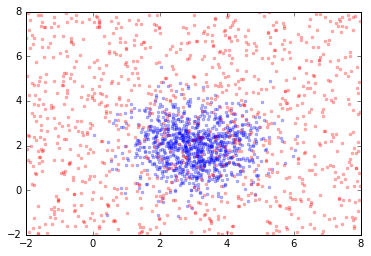

In [133]:

class1 = np.zeros((1000,3))
class1[:, 0] = 1.
class1[:, 1] = np.random.randn(1000)+3
class1[:, 2] = np.random.randn(1000)+2

class2 = np.zeros((1000,3))
class2[:, 0] = -1
class2[:, 1] = np.random.random(1000)*10-2
class2[:, 2] = np.random.random(1000)*10-2

data = np.concatenate([class1, class2])

class1idx = data[:,0] == 1

class2idx = data[:,0] == -1

plt.plot(data[class1idx, 1], data[class1idx, 2], '.b', alpha=0.3)
plt.plot(data[class2idx, 1], data[class2idx, 2], '.r', alpha=0.3)
print data